In [46]:
import torch
import torch.optim as optim
from torchvision.models import vgg16
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
model = vgg16()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [42]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

## LambdaLR

- デフォルトをoptimizer指定のlrとする
- その値に対してlambda1で指定された関数をかけた学習率を使う
- 例えば、epoch=3だったら default_lr * 0.95 ** 3

In [52]:
# LambdaLR
lambda1 = lambda epoch: 0.95 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

epochs = []
lr = []
for epoch in range(100):
    scheduler.step()
    epochs.append(epoch)
    lr.append(scheduler.get_lr())

Text(0.5,1,'LambdaLR (lambda = 0.95 ** epoch)')

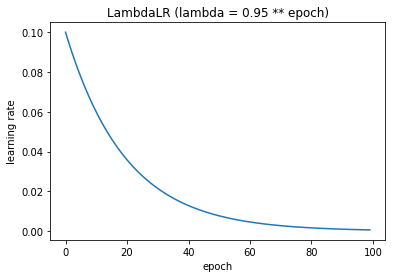

In [53]:
plt.plot(epochs, lr)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('LambdaLR (lambda = 0.95 ** epoch)')

## StepLR

- step_sizeのepochごとにgammaで指定した値を学習率にかける

In [55]:
# StepLR
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

epochs = []
lr = []
for epoch in range(100):
    scheduler.step()
    epochs.append(epoch)
    lr.append(scheduler.get_lr())

Text(0.5,1,'StepLR (step_size=30, gamma=0.1)')

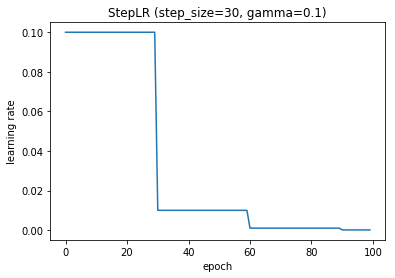

In [56]:
plt.plot(epochs, lr)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('StepLR (step_size=30, gamma=0.1)')

## MultiStepLR

- StepLRと違ってどのエポックでgammaをかけるか決められる

In [67]:
# MultiStepLR
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30, 80], gamma=0.1)

epochs = []
lr = []
for epoch in range(100):
    scheduler.step()
    epochs.append(epoch)
    lr.append(scheduler.get_lr())

Text(0.5,1,'MultiStepLR (milestones=[30, 80], gamma=0.1)')

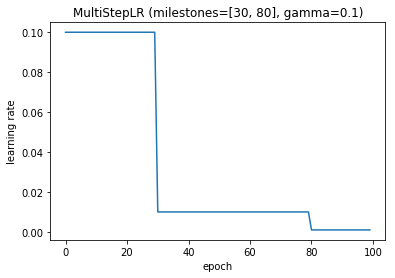

In [68]:
plt.plot(epochs, lr)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('MultiStepLR (milestones=[30, 80], gamma=0.1)')

## ExponentialLR

- 毎エポックでgammaをかける

In [69]:
# ExponentialLR
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)

epochs = []
lr = []
for epoch in range(100):
    scheduler.step()
    epochs.append(epoch)
    lr.append(scheduler.get_lr())

Text(0.5,1,'ExponentialLR (gamma=0.98)')

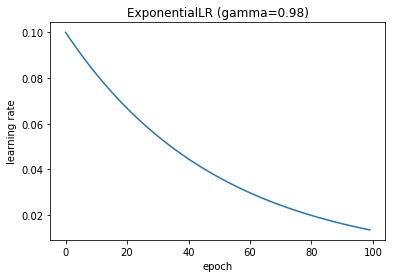

In [71]:
plt.plot(epochs, lr)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('ExponentialLR (gamma=0.98)')

## CosineAnnealingLR

- 周期的にLRを変化させる
- CyclicLRの一種？

In [84]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0.0)

epochs = []
lr = []
for epoch in range(100):
    scheduler.step()
    epochs.append(epoch)
    lr.append(scheduler.get_lr())

Text(0.5,1,'CosineAnnealingLR (T_max=20, eta_min=0.0)')

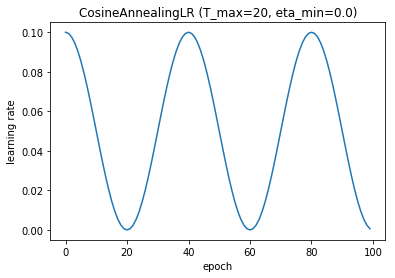

In [86]:
plt.plot(epochs, lr)
plt.xlabel('epoch')
plt.ylabel('learning rate')
plt.title('CosineAnnealingLR (T_max=20, eta_min=0.0)')

## ReduceLROnPlateau

- 指標（val_loss）がプラトー（一定値）に入ったらLRを下げる
- scheduler.step(val_loss) のようにval_lossを与える必要がある

In [87]:
schedulr = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')